## This notebook visualizes the crashes in district 11 and in Chicago on a heatmap

In [1]:
import os
import findspark
findspark.init()
import pyspark
from pyspark import SQLContext
sc = pyspark.SparkContext(master='spark://192.168.11.239:7077', appName='data_cleaner')

In [2]:
sqlContext = SQLContext(sc)

In [3]:
from datetime import datetime
import pyspark.sql.functions as F #avoid conflicts with regular python functions
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly
import plotly.offline as py
import seaborn as sns

In [4]:
from numpy import array
from pyspark.mllib.clustering import BisectingKMeans, BisectingKMeansModel

### Data for district 11

In [5]:
df = sqlContext.read.csv("/datasets/crashes_d11.csv", header='true')

In [6]:
# dfDay = (df
#        .withColumn('LATITUDE','LONGITUDE'))
#       )

In [7]:
locdf = df.select(["LATITUDE", "LONGITUDE"])

In [8]:
pddata = locdf.toPandas()

In [10]:
pddata

,LATITUDE,LONGITUDE
0,41.878205089,-87.740780714
1,41.866501191,-87.686157599
2,41.895527078,-87.69909818299999
3,41.895784449000004,-87.72135274600001
4,41.876926589,-87.745039137
...,...,...
21557,41.883250391,-87.72588315
21558,41.868755198,-87.685950229
21559,41.885318235999996,-87.72098685200001
21560,41.895519039,-87.725938784


### Data for Chicago

In [11]:
df2 = sqlContext.read.csv("/datasets/traffic_crashes.csv", header='true')

In [12]:
locdf2 = df2.select(["LATITUDE", "LONGITUDE"])

In [13]:
pddata2 = locdf2.toPandas()

In [14]:
pddata2 = pddata2.dropna()

In [15]:
pddata2["LONGITUDE"].value_counts()

-87.905309125    502
-87.580147769    250
-87.585971993    246
-87.585275565    207
-87.741645644    191
                ... 
-87.69608975       1
-87.753374811      1
-87.585213513      1
-87.681505689      1
-87.742273861      1
Name: LONGITUDE, Length: 177017, dtype: int64

In [16]:
pddata2 = pddata2.loc[pddata2["LONGITUDE"].apply(lambda x: -87 > float(x) > -88)]

In [17]:
pddata2.shape

(381116, 2)

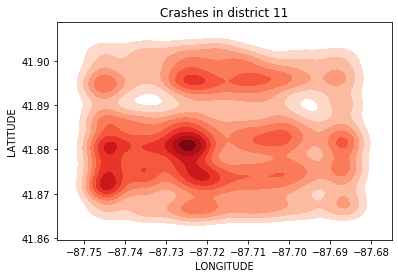

In [18]:
sns.kdeplot(pddata["LONGITUDE"], 
            pddata["LATITUDE"], 
            color='r', shade=True, 
            cmap="Reds", 
            shade_lowest=False).set_title('Crashes in district 11');

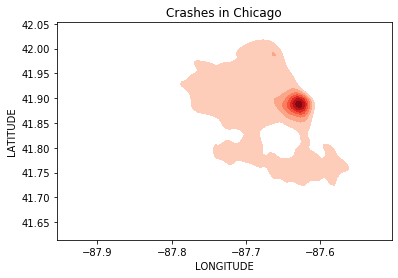

In [19]:
sns.kdeplot(pddata2["LONGITUDE"], 
            pddata2["LATITUDE"],  
            color='r', shade=True, 
            cmap="Reds", 
            shade_lowest=False).set_title('Crashes in Chicago');